## Data Modeling
Describe and justify the process for analyzing or modeling the data.

Questions to consider:

How did you analyze or model the data?
How did you iterate on your initial approach to make it better?
Why are these choices appropriate given the data and the business problem?

# Contents
1. Load the dataset
2. Baseline model
3. Model Iterations

## 1.Loading Dataset

In [1]:
%load_ext autoreload
%autoreload 2
from tensorflow.keras.regularizers import l1, l2
from my_modules.model_evaluator import modeler
from tensorflow.keras import models, layers, metrics, callbacks, regularizers
from my_modules.import_datasets import create_dataset, process_dataset
from tensorflow.keras.optimizers import SGD, RMSprop
import tensorflow as tf
import numpy as np
import random

# Set the random seeds for reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                               min_delta=0.001, 
                               patience=10, 
                               mode='min', 
                               restore_best_weights=True,
                               verbose=1)

2024-03-05 21:32:34.791951: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir = "data/chest_xray/new_train"
val_dir = "data/chest_xray/new_val"
test_dir = "data/chest_xray/new_test"

train_ds = process_dataset(create_dataset(train_dir))
val_ds = process_dataset(create_dataset(val_dir))
test_ds = process_dataset(create_dataset(test_dir))

for inputs, labels in train_ds.take(1):
        input_shape = inputs.shape[1:]
        break

Found 4684 files belonging to 2 classes.
Found 585 files belonging to 2 classes.
Found 587 files belonging to 2 classes.


For metrics, I chose accuracy to show overall performance of the model, Recall to emphasise the importance of minimizing false negatives, and AUC. 

In [4]:
#model_R5: Conv Dense

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results , model = modeler(
    model, file_name = 'test2', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=2, early_stopping = early_stopping)

FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/test.keras'

## Baseline Model

In [ ]:
#baseline
baseline_model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

baseline_results, baseline_model = modeler(
    baseline_model, file_name= 'baseline', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=20)

## Initializers

In [ ]:
#model_I1: he_normal
model_I1 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(10, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')])

results_I1, model_I1 = modeler(
    model_I1, file_name= 'model_I1', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=20)

In [ ]:
#model_I2: lecun_normal
model_I2 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(10, activation='relu',kernel_initializer='lecun_normal'),
    layers.Dense(1, activation='sigmoid')])

results_I2, model_I2 = modeler(
    model_I2, file_name= 'model_I2', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=20)

Choosing he_normal for 'relu' also lowest loss

## Model Iteration
Lets find the most overfit model my system can hold

In [ ]:
#model_2: 1 layer dense with 128 nodes
model_2 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')])

results_2, model_2 = modeler(
    model_2, file_name= 'model_2', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

In [ ]:
#model_3: - 2 layer dense with 128, 64 nodes

model_3 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')])

results_3, model_3 = modeler(
    model_3, file_name= 'model_3', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

In [ ]:
#model_4: 2 layer dense with 128, 64 nodes with 0.3 dropout

model_4 = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')])

results_4, model_4 = modeler(
    model_4, file_name= 'model_4', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

In [ ]:
#model_5: Conv Network

model_5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_5, model_5 = modeler(
    model_5, file_name = 'model_5', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

In [ ]:
#model_6: Conv 2 layer, 32, 64

model_6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_6, model_6 = modeler(
    model_6, file_name = 'model_6', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50)

In [ ]:
#model_7: Conv 3 layer, 32, 64, 128
model_7 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_7, model_7 = modeler(
    model_7, file_name = 'model_7', file_path= 'saved_models/', 
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = None)

## Optimizers

In [ ]:
#model_O1: Adam with early stopping
model_O1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_O1, model_O1 = modeler(
    model_O1, file_name = 'model_O1', file_path= 'saved_models/', optimizer='adam',
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [ ]:
#model_O2: SGD


model_O2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_O2, model_O2 = modeler(
    model_O2, file_name = 'model_O2', file_path= 'saved_models/', optimizer='SGD',
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [ ]:
#model_O3: RMSprop

model_O3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_O3, model_O3 = modeler(
    model_O3, file_name = 'model_O3', file_path= 'saved_models/', optimizer='rmsprop',
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Going with SGD based on loss curve

In [ ]:
#model_O4: SGD 0.1 - Too high

optimizer = SGD(learning_rate=0.1, momentum=0)

model_O4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_O4, model_O2 = modeler(
    model_O4, file_name = 'model_O4', file_path= 'saved_models/', optimizer=optimizer,
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [ ]:
#model_O5: SGD 0.01

optimizer = SGD(learning_rate=0.01, momentum=0)

model_O5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_O5, model_O5 = modeler(
    model_O5, file_name = 'model_O5', file_path= 'saved_models/', optimizer=optimizer,
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [ ]:
#model_O6: SGD 0.001 - 0

optimizer = SGD(learning_rate=0.001, momentum=0.5)

model_O6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_O6, model_O6 = modeler(
    model_O6, file_name = 'model_O6', file_path= 'saved_models/', optimizer=optimizer,
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Going with a learning rate of 0.01 as it seems to learn faster given training loss values 

In [ ]:
#model_O7: SGD 0.01 - 0.5

optimizer = SGD(learning_rate=0.01, momentum=0.5)

model_O7 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_O7, model_O7 = modeler(
    model_O7, file_name = 'model_O7', file_path= 'saved_models/', optimizer=optimizer,
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [ ]:
#model_O8: SGD 0.01 - 0.9

optimizer = SGD(learning_rate=0.01, momentum=0.9)

model_O8 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_O8, model_O8 = modeler(
    model_O8, file_name = 'model_O8', file_path= 'saved_models/', optimizer=optimizer,
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

In [ ]:
#model_O9: SGD 0.01 - 0.99

optimizer = SGD(learning_rate=0.01, momentum=0.99)

model_O9 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_O9, model_O9 = modeler(
    model_O9, file_name = 'model_O9', file_path= 'saved_models/', optimizer=optimizer,
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

selecting a momentum of 0.9 as it converged the fastest with the lowest val_loss without making training too unstable as the model did with a momentum of 0.9

## Regularization
Model above needs to be clearly overfit, time for reguluarization

### Dropout

Training time: 129.21604347229004 seconds



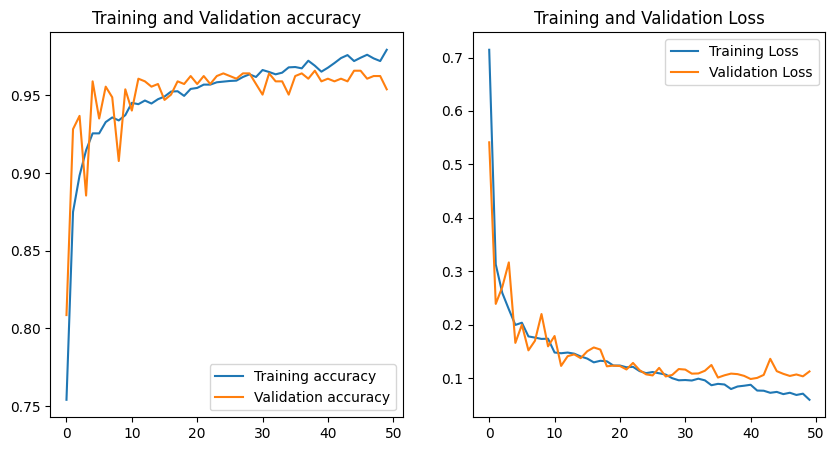

,loss,auc,recall,accuracy
Train,0.045954,0.999076,0.985372,0.987404
Val,0.112231,0.991522,0.957845,0.953846
Diff,0.066277,-0.007555,-0.027526,-0.033558


------------------------------



In [6]:
#model_R1: Dropout after max

model_R1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_R1, model_R1 = modeler(
    model_R1, file_name = 'model_R1', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 25.
Epoch 35: early stopping
Training time: 108.72164988517761 seconds



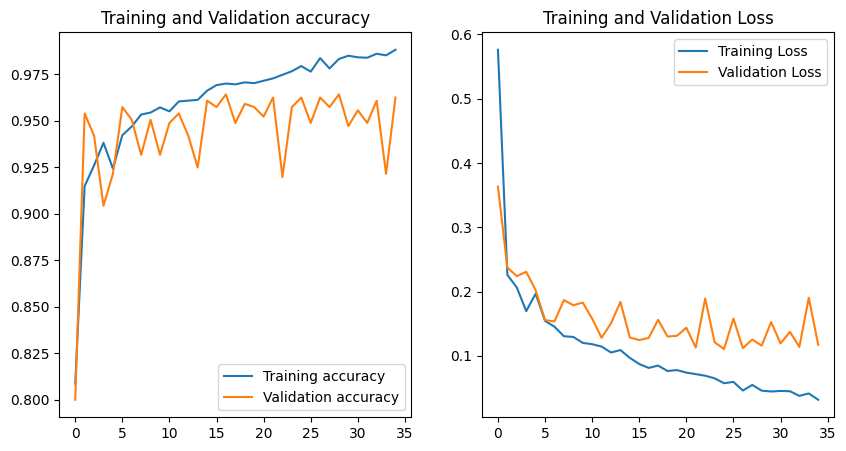

,loss,auc,recall,accuracy
Train,0.051838,0.999051,0.997659,0.991887
Val,0.110699,0.989491,0.981265,0.962393
Diff,0.058861,-0.009560,-0.016395,-0.029494


------------------------------



In [3]:
#model_R2: Dropout after Conv

model_R2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_R2, model_R2 = modeler(
    model_R2, file_name = 'model_R2', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 10.
Epoch 20: early stopping
Training time: 50.374139070510864 seconds



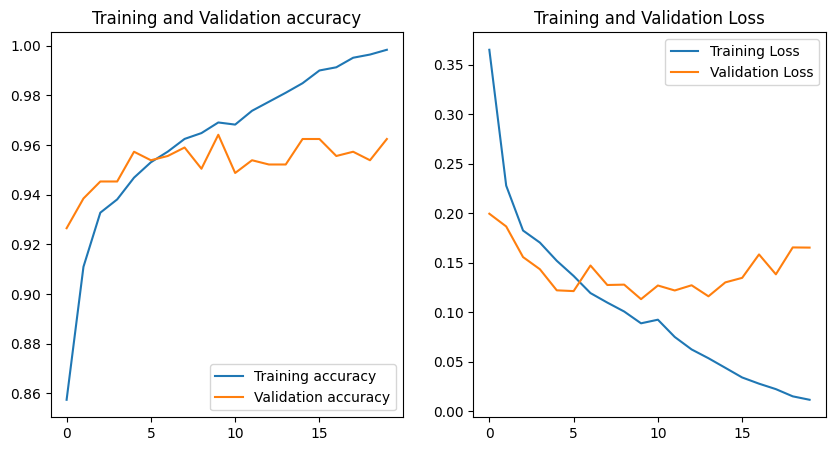

,loss,auc,recall,accuracy
Train,0.069338,0.995703,0.990345,0.978010
Val,0.113154,0.985793,0.983607,0.964103
Diff,0.043816,-0.009910,-0.006739,-0.013908


------------------------------



In [5]:
#model_R3: Dropout after Dense

model_R3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),   
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),        
    layers.Dense(1, activation='sigmoid')
])
results_R3, model_R3 = modeler(
    model_R3, file_name = 'model_R3', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Training time: 129.0675766468048 seconds



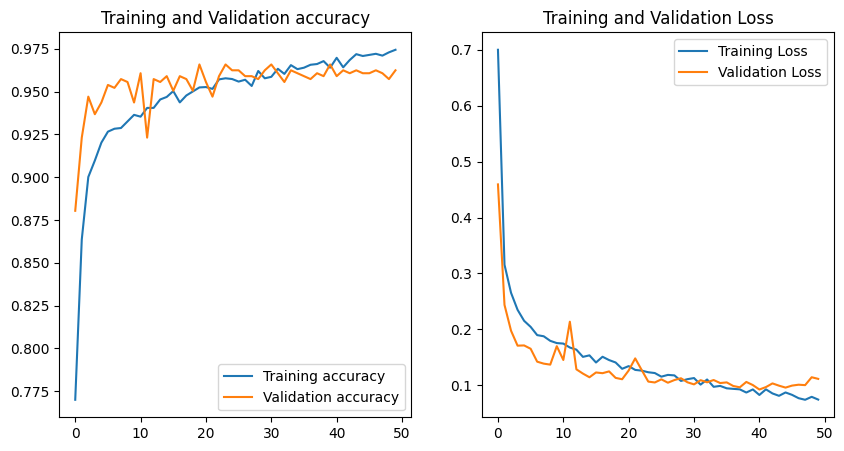

,loss,auc,recall,accuracy
Train,0.052386,0.997768,0.982446,0.982280
Val,0.111283,0.991003,0.971897,0.962393
Diff,0.058897,-0.006765,-0.010549,-0.019887


------------------------------



In [7]:
#model_R4: max Dense

model_R4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_R4, model_R4 = modeler(
    model_R4, file_name = 'model_R4', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 26.
Epoch 36: early stopping
Training time: 114.93073081970215 seconds



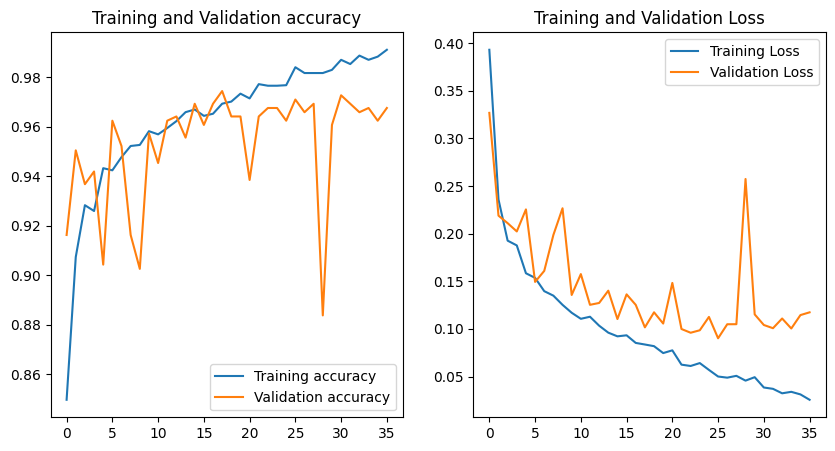

,loss,auc,recall,accuracy
Train,0.037281,0.999479,0.996782,0.994449
Val,0.090117,0.993263,0.983607,0.970940
Diff,0.052836,-0.006216,-0.013175,-0.023509


------------------------------



In [8]:
#model_R5: Conv Dense

model_R5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_R5, model_R5 = modeler(
    model_R5, file_name = 'model_R5', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Selecting Droppout after Conv & Dense based on low val_loss and high val_accuracy

Restoring model weights from the end of the best epoch: 25.
Epoch 35: early stopping
Training time: 110.7523033618927 seconds



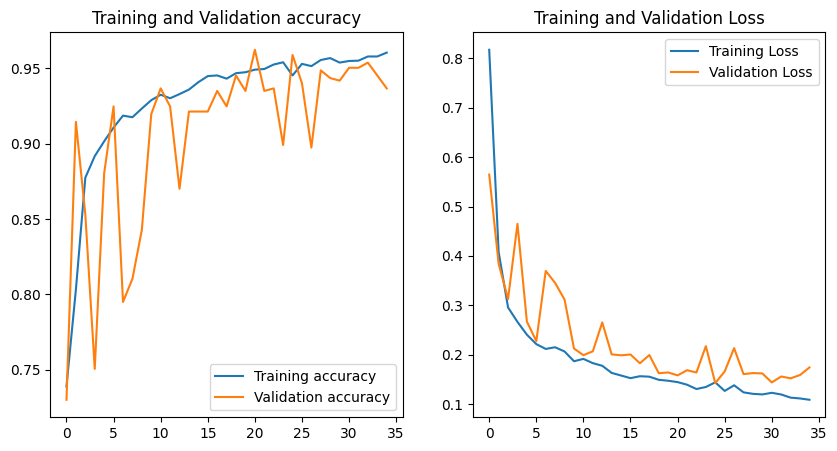

,loss,auc,recall,accuracy
Train,0.151331,0.986882,0.968695,0.950897
Val,0.142212,0.989283,0.976581,0.958974
Diff,-0.009118,0.002401,0.007886,0.008078


------------------------------



In [9]:
#model_R6: Conv with 0.5 for hidden layers

model_R6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.5),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.5),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
results_R6, model_R6 = modeler(
    model_R6, file_name = 'model_R6', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

sticking with 0.25 dropout for conv and dense

### L1/L2 Regulation

Restoring model weights from the end of the best epoch: 7.
Epoch 17: early stopping
Training time: 47.55682611465454 seconds



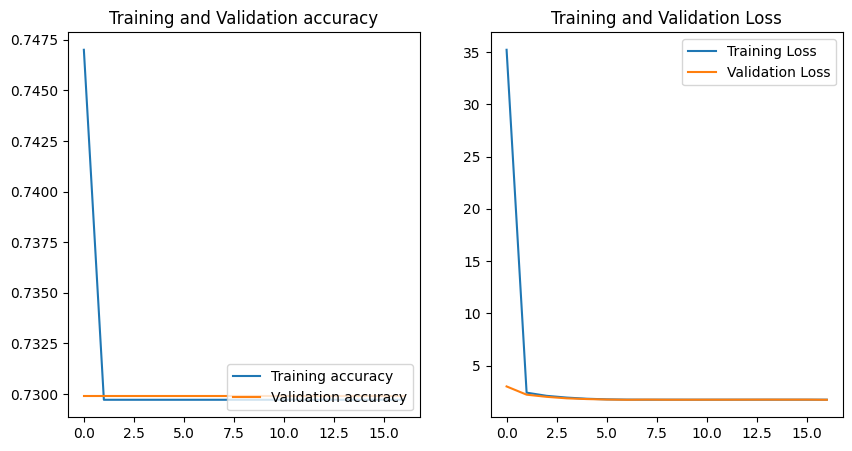

,loss,auc,recall,accuracy
Train,1.734225,0.5,1.0,0.729718
Val,1.734020,0.5,1.0,0.729915
Diff,-0.000205,0.0,0.0,0.000196


------------------------------



In [12]:
#model_R7 L1 regularization
model_R7 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l1(0.01), input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l1(0.01)),   
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l1(0.01)),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer=l1(0.01)),
    layers.Dense(1, activation='sigmoid')
])
results_R7, model_R7 = modeler(
    model_R7, file_name = 'model_R7', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 19.
Epoch 29: early stopping
Training time: 75.79502987861633 seconds



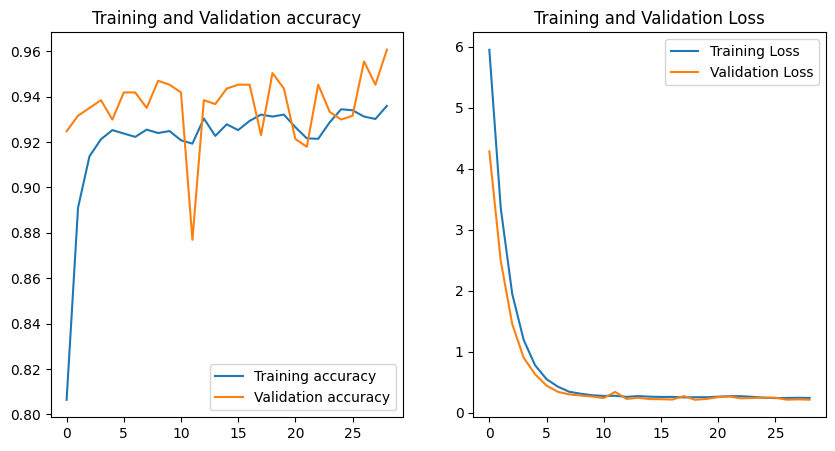

,loss,auc,recall,accuracy
Train,0.227895,0.979894,0.957578,0.943638
Val,0.213436,0.982725,0.969555,0.950427
Diff,-0.014460,0.002831,0.011977,0.006789


------------------------------



In [13]:
#model_R8 L2 regularization

model_R8 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01), input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),   
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),   
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    layers.Dense(1, activation='sigmoid')
])
results_R8, model_R8 = modeler(
    model_R8, file_name = 'model_R8', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

### Data Augmentation

Restoring model weights from the end of the best epoch: 18.
Epoch 28: early stopping
Training time: 251.63119316101074 seconds



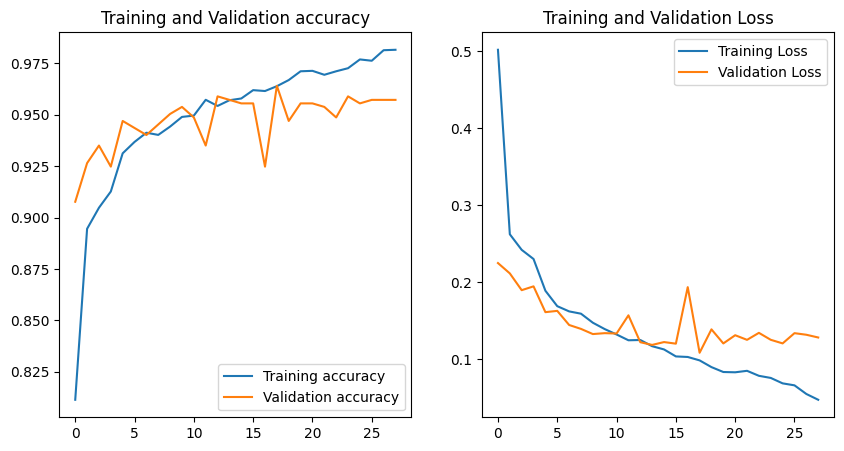

,loss,auc,recall,accuracy
Train,0.083668,0.993842,0.978935,0.970752
Val,0.108707,0.988513,0.981265,0.964103
Diff,0.025039,-0.005329,0.002330,-0.006649


------------------------------



In [15]:
#model_R9 RandomFlip

model_R9 = models.Sequential([
    layers.RandomFlip("horizontal", seed=42, input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),   
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),   
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_R9, model_R9 = modeler(
    model_R9, file_name = 'model_R9', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 37.
Epoch 47: early stopping
Training time: 145.10958790779114 seconds



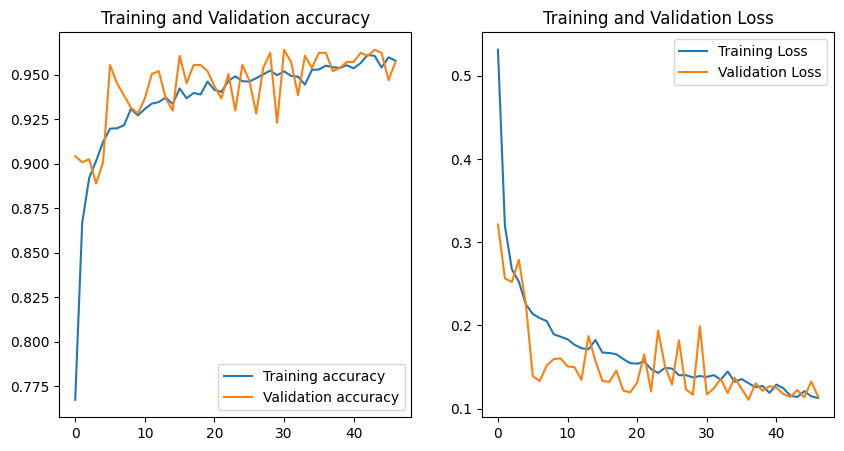

,loss,auc,recall,accuracy
Train,0.111502,0.989658,0.983031,0.962212
Val,0.110693,0.990766,0.983607,0.962393
Diff,-0.000809,0.001108,0.000576,0.000181


------------------------------



In [17]:
#model_R10 RandomRotation
model_R10 = models.Sequential([
    layers.RandomRotation(0.2, seed=42, input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),   
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),   
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_R10, model_R10 = modeler(
    model_R10, file_name = 'model_R10', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 16.
Epoch 26: early stopping
Training time: 77.76065182685852 seconds



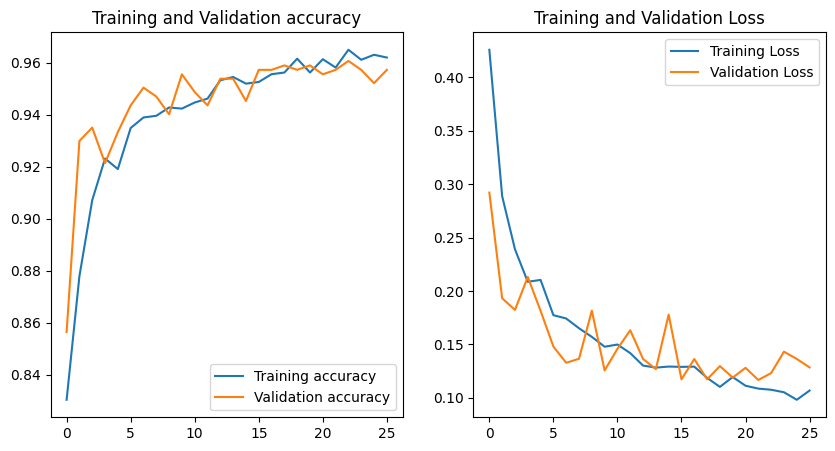

,loss,auc,recall,accuracy
Train,0.112188,0.991601,0.961088,0.960717
Val,0.117270,0.988772,0.957845,0.957265
Diff,0.005081,-0.002829,-0.003243,-0.003452


------------------------------



In [18]:
#model_R11 RandomZoom
model_R11 = models.Sequential([
    layers.RandomZoom(0.2, seed=42, input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),   
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),   
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_R11, model_R11 = modeler(
    model_R11, file_name = 'model_R11', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 21.
Epoch 31: early stopping
Training time: 303.0113763809204 seconds



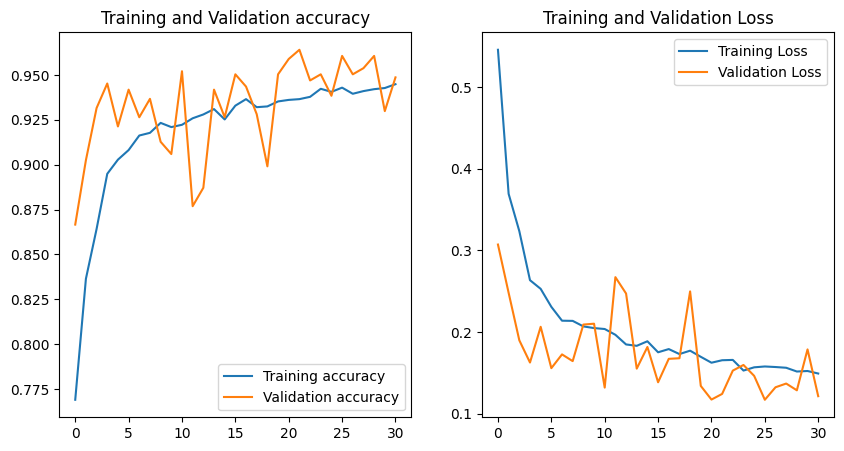

,loss,auc,recall,accuracy
Train,0.145478,0.982638,0.963429,0.944919
Val,0.117219,0.988772,0.981265,0.958974
Diff,-0.028259,0.006134,0.017836,0.014055


------------------------------



In [19]:
#model_R12 all data augmentations
model_R12 = models.Sequential([
    layers.RandomFlip("horizontal", seed=42, input_shape=input_shape),
    layers.RandomRotation(0.2, seed=42),
    layers.RandomZoom(0.2, seed=42),
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),   
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),   
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_R12, model_R12 = modeler(
    model_R12, file_name = 'model_R12', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

The best data augmentation seemed to be RandomRotation, slightly better val_auc & val_recall, plus faster than RandomFlip.

Restoring model weights from the end of the best epoch: 13.
Epoch 23: early stopping
Training time: 81.16369342803955 seconds



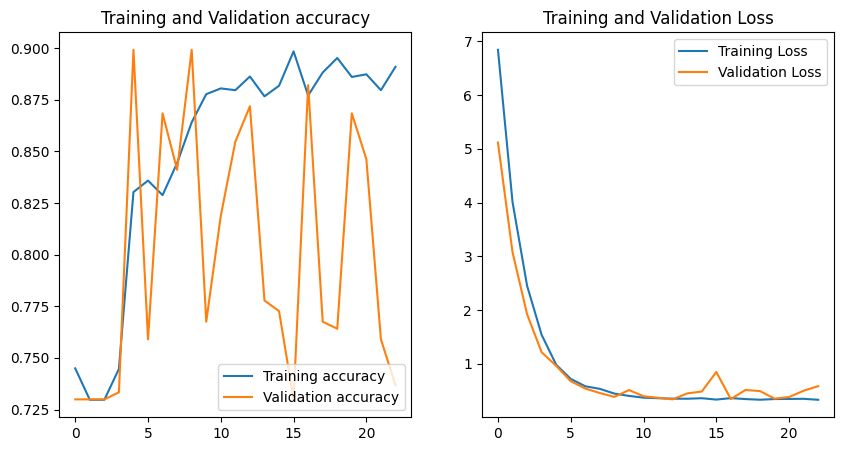

,loss,auc,recall,accuracy
Train,0.360893,0.958972,0.980983,0.866994
Val,0.338743,0.974268,0.988290,0.871795
Diff,-0.022150,0.015296,0.007307,0.004801


------------------------------



In [20]:
#model_R13 drop l2 aug
model_R13 = models.Sequential([
    layers.RandomRotation(0.2, seed=42, input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_R13, model_R13 = modeler(
    model_R13, file_name = 'model_R13', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 27.
Epoch 37: early stopping
Training time: 114.7539792060852 seconds



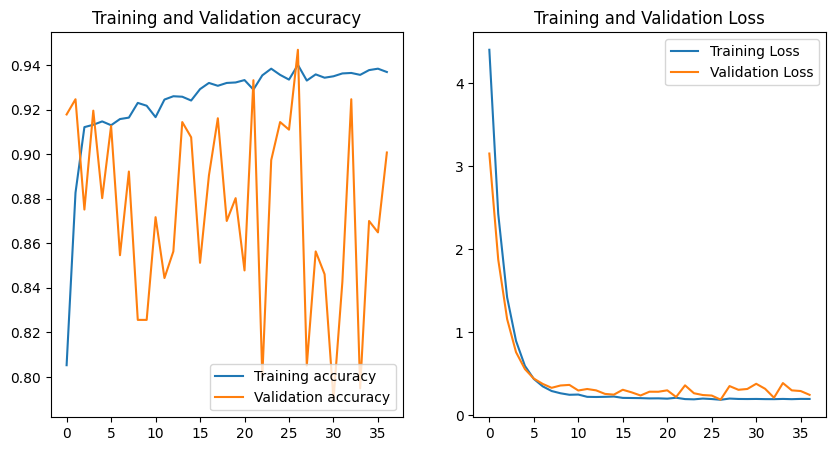

,loss,auc,recall,accuracy
Train,0.193245,0.984396,0.981276,0.937233
Val,0.190354,0.985904,0.992974,0.947009
Diff,-0.002891,0.001508,0.011699,0.009775


------------------------------



In [21]:
#model_R14 drop l2
model_R14 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01), input_shape= input_shape),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_R14, model_R14 = modeler(
    model_R14, file_name = 'model_R14', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 12.
Epoch 22: early stopping
Training time: 74.81054329872131 seconds



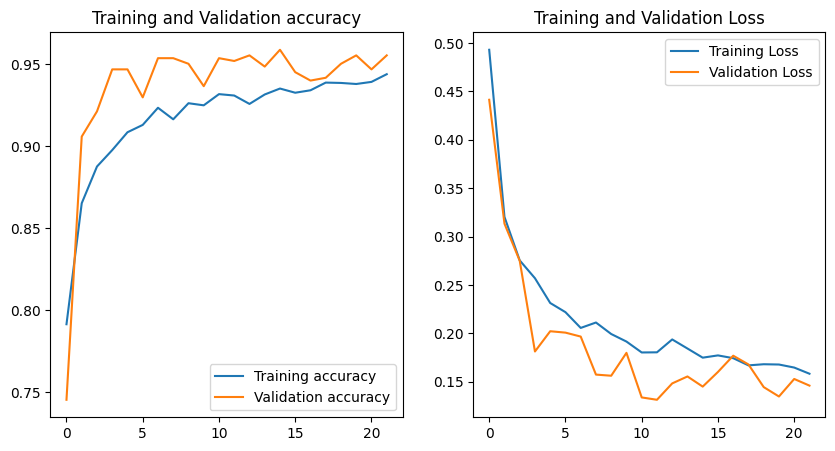

,loss,auc,recall,accuracy
Train,0.163353,0.980640,0.942657,0.938301
Val,0.131506,0.988572,0.962529,0.952137
Diff,-0.031847,0.007932,0.019873,0.013836


------------------------------



In [22]:
#model_R15 drop aug
model_R15 = models.Sequential([
    layers.RandomRotation(0.2, seed=42, input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_R15, model_R15 = modeler(
    model_R15, file_name = 'model_R15', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Training time: 164.248064994812 seconds



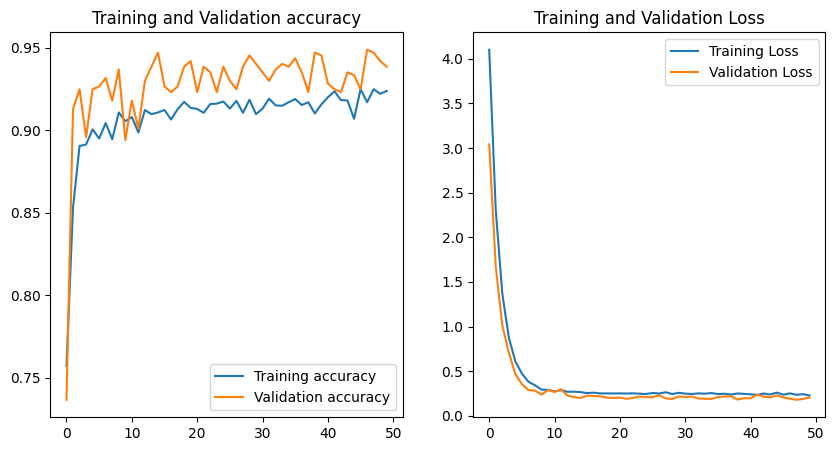

,loss,auc,recall,accuracy
Train,0.241812,0.973715,0.917788,0.920367
Val,0.203300,0.983028,0.946136,0.938462
Diff,-0.038512,0.009314,0.028348,0.018094


------------------------------



In [23]:
#model_R16 l2 aug
model_R16 = models.Sequential([
    layers.RandomRotation(0.2, seed=42, input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),   
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid')
])
results_R16, model_R16 = modeler(
    model_R16, file_name = 'model_R16', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

final selection of regularization Dropout!

## Last Adjustments

Restoring model weights from the end of the best epoch: 21.
Epoch 31: early stopping
Training time: 91.74494862556458 seconds



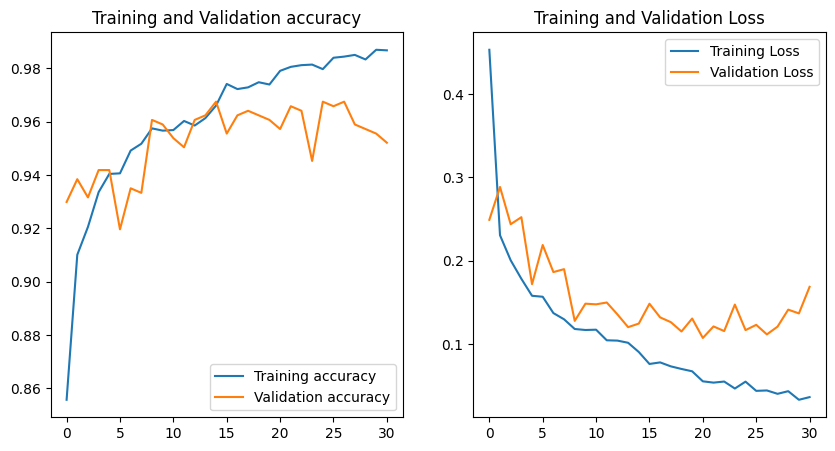

,loss,auc,recall,accuracy
Train,0.065418,0.999000,0.983031,0.985056
Val,0.107193,0.992418,0.962529,0.957265
Diff,0.041776,-0.006582,-0.020502,-0.027791


------------------------------



In [24]:
#model_LA1 optimizer='adam'
model_LA1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_LA1, model_LA1 = modeler(
    model_LA1, file_name = 'model_LA1', file_path= 'saved_models/', optimizer = 'adam',
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 16.
Epoch 26: early stopping
Training time: 90.6186261177063 seconds



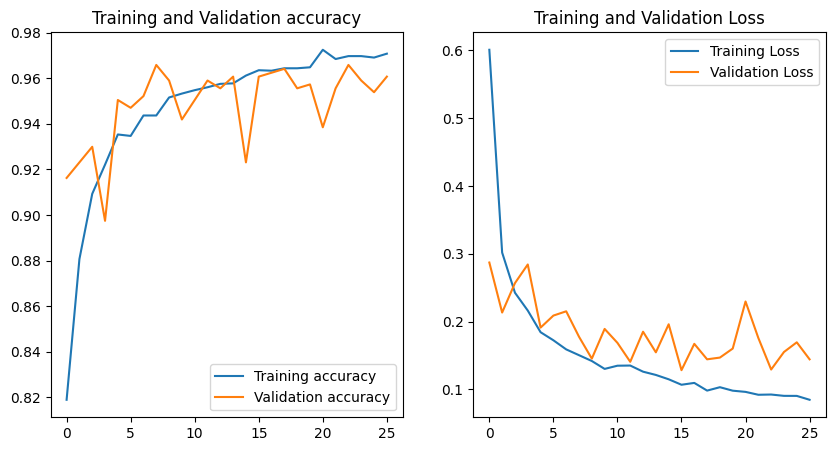

,loss,auc,recall,accuracy
Train,0.092865,0.995290,0.988882,0.974381
Val,0.128469,0.987497,0.985949,0.960684
Diff,0.035603,-0.007793,-0.002934,-0.013697


------------------------------



In [27]:
#model_LA2 optimizer='rmsprop'
model_LA2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal', input_shape= input_shape),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_LA2, model_LA2 = modeler(
    model_LA2, file_name = 'model_LA2', file_path= 'saved_models/', optimizer = 'rmsprop',
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 32.
Epoch 42: early stopping
Training time: 131.5594618320465 seconds



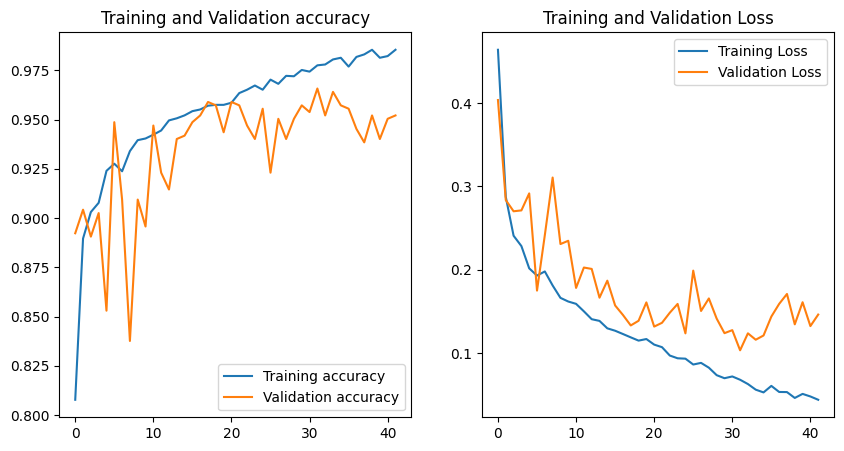

,loss,auc,recall,accuracy
Train,0.059814,0.997900,0.987712,0.981640
Val,0.103283,0.989617,0.985949,0.965812
Diff,0.043470,-0.008283,-0.001764,-0.015828


------------------------------



In [28]:
#model_LA3 kernel_initializer= None
model_LA3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape= input_shape),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_LA3, model_LA3 = modeler(
    model_LA3, file_name = 'model_LA3', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

Restoring model weights from the end of the best epoch: 27.
Epoch 37: early stopping
Training time: 110.60850501060486 seconds



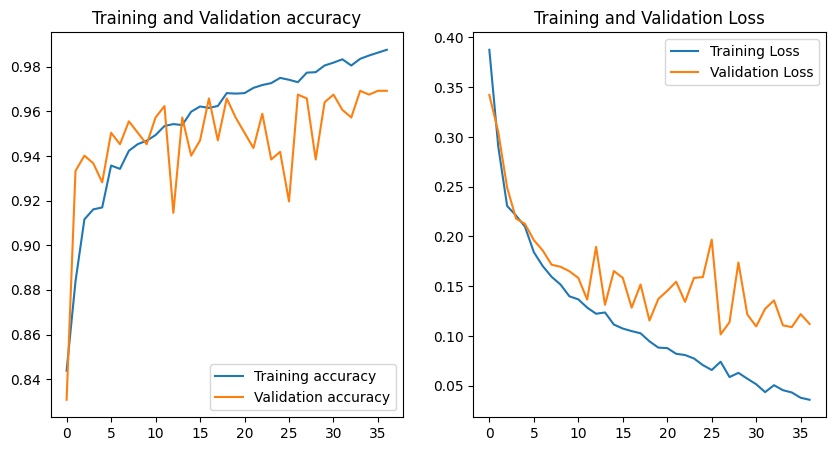

,loss,auc,recall,accuracy
Train,0.057468,0.998193,0.986542,0.984202
Val,0.101576,0.990721,0.983607,0.967521
Diff,0.044108,-0.007472,-0.002935,-0.016680


------------------------------



In [30]:
#model_LA4 kernel_initializer='lecun_normal'
model_LA4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='lecun_normal', input_shape= input_shape),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='lecun_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='lecun_normal'),
    layers.Dropout(0.25),    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_initializer='lecun_normal'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])
results_LA4, model_LA4 = modeler(
    model_LA4, file_name = 'model_LA4', file_path= 'saved_models/', optimizer = SGD(learning_rate=0.01, momentum=0.9),
    train=train_ds, val=val_ds, num_epochs=50, early_stopping = early_stopping)

and the best model is... model_R5! Dropout layers after conv and dense layers with 0.25!